## Testando método poly1d

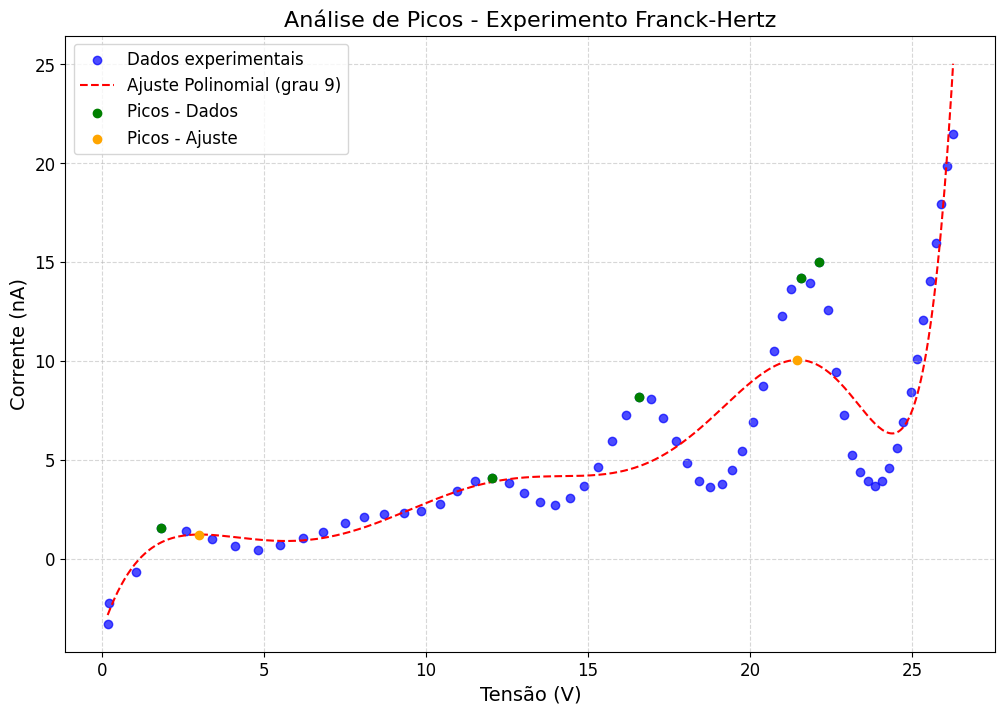

Picos nos dados experimentais (tensão, corrente):
Tensão: 1.83 V, Corrente: 1.58 nA
Tensão: 12.04 V, Corrente: 4.10 nA
Tensão: 16.57 V, Corrente: 8.19 nA
Tensão: 21.57 V, Corrente: 14.22 nA
Tensão: 22.14 V, Corrente: 15.00 nA

Picos na curva ajustada (tensão, corrente):
Tensão: 3.00 V, Corrente: 1.25 nA
Tensão: 21.46 V, Corrente: 10.07 nA


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Função para ajuste polinomial
def ajustar_polinomio(x, y, grau):
    coeficientes = np.polyfit(x, y, grau)
    polinomio = np.poly1d(coeficientes)
    return polinomio, coeficientes

# Carregar dados (substitua pelo seu arquivo CSV)
file_path = "A_FIXO_2.csv"
df = pd.read_csv(file_path, skiprows=1)  # Ignorar cabeçalhos nas primeiras linhas, se necessário

# Extrair colunas de tensão e corrente
try:
    # Limpeza e conversão das colunas
    tensao = df.iloc[:, 2].astype(str).str.replace(',', '.').str.strip()
    corrente = df.iloc[:, 1].astype(str).str.replace(',', '.').str.strip()
    
    # Converter para numérico
    tensao = pd.to_numeric(tensao, errors='coerce').dropna()
    corrente = pd.to_numeric(corrente, errors='coerce').dropna()
except IndexError:
    print("Erro: O arquivo não possui colunas suficientes. Verifique o formato dos dados.")
    exit()

# Verificar se as colunas não estão vazias
if tensao.empty or corrente.empty:
    print("Erro: As colunas de tensão ou corrente estão vazias. Verifique o arquivo de entrada.")
    exit()

# Ajuste polinomial
grau_polinomio = 9
polinomio, coeficientes = ajustar_polinomio(tensao, corrente, grau_polinomio)

# Gerar curva ajustada
x_fit = np.linspace(tensao.min(), tensao.max(), 500)
y_fit = polinomio(x_fit)

# Encontrar picos nos dados experimentais
picos_dados, _ = find_peaks(corrente, height=0)  # Altura mínima pode ser ajustada
picos_ajuste, _ = find_peaks(y_fit, height=0)

# Visualização dos resultados
plt.figure(figsize=(12, 8))

# Plot dos dados experimentais
plt.scatter(tensao, corrente, label='Dados experimentais', color='blue', alpha=0.7)

# Plot da curva ajustada
plt.plot(x_fit, y_fit, label=f'Ajuste Polinomial (grau {grau_polinomio})', color='red', linestyle='--')

# Marcar picos nos dados experimentais
if len(picos_dados) > 0:
    plt.scatter(tensao.iloc[picos_dados], corrente.iloc[picos_dados], color='green', label='Picos - Dados', zorder=5)

# Marcar picos na curva ajustada
if len(picos_ajuste) > 0:
    plt.scatter(x_fit[picos_ajuste], y_fit[picos_ajuste], color='orange', label='Picos - Ajuste', zorder=5)

# Configurações do gráfico
plt.title('Análise de Picos - Experimento Franck-Hertz', fontsize=16)
plt.xlabel('Tensão (V)', fontsize=14)
plt.ylabel('Corrente (nA)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Salvar o gráfico
plt.savefig("analise_picos.png", dpi=300)
plt.show()

# Exibir posições dos picos
print("Picos nos dados experimentais (tensão, corrente):")
if len(picos_dados) > 0:
    for i in picos_dados:
        print(f"Tensão: {tensao.iloc[i]:.2f} V, Corrente: {corrente.iloc[i]:.2f} nA")
else:
    print("Nenhum pico encontrado nos dados experimentais.")

print("\nPicos na curva ajustada (tensão, corrente):")
if len(picos_ajuste) > 0:
    for i in picos_ajuste:
        print(f"Tensão: {x_fit[i]:.2f} V, Corrente: {y_fit[i]:.2f} nA")
else:
    print("Nenhum pico encontrado na curva ajustada.")


## Testando Método do Spline Cubico

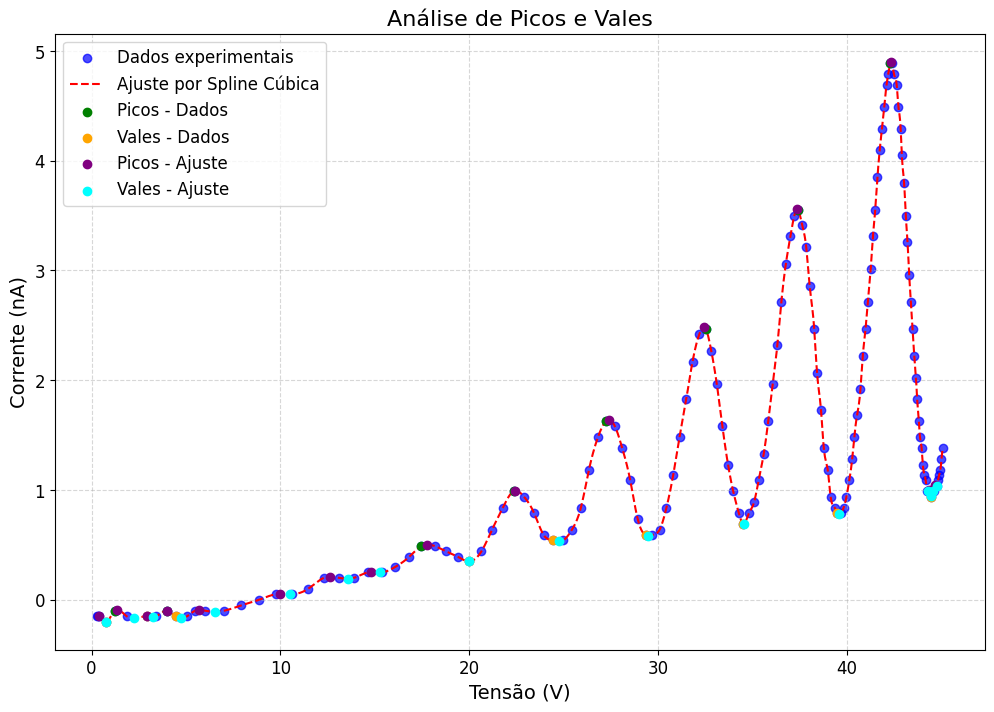

Distâncias entre pontos consecutivos nos Dados Experimentais:
0.03
0.09
0.33
0.49
0.63
1.08
0.48
0.56
0.48
0.60
0.42
0.54
0.99
0.93
0.93
0.90
0.87
0.83
0.85
0.78
0.81
0.75
0.75
0.69
0.73
0.67
0.69
0.62
0.63
0.60
0.64
0.60
0.60
0.59
0.54
0.56
0.55
0.51
0.51
0.49
0.51
0.54
0.57
0.47
0.45
0.44
0.51
0.52
0.45
0.36
0.39
0.41
0.47
0.47
0.50
0.47
0.44
0.33
0.36
0.42
0.49
0.46
0.36
0.36
0.26
0.32
0.29
0.31
0.36
0.38
0.42
0.42
0.44
0.42
0.35
0.28
0.22
0.25
0.29
0.39
0.46
0.43
0.40
0.38
0.29
0.28
0.23
0.16
0.18
0.16
0.18
0.21
0.24
0.23
0.25
0.30
0.32
0.29
0.27
0.34
0.32
0.27
0.32
0.28
0.22
0.23
0.23
0.13
0.16
0.09
0.13
0.18
0.22
0.23
0.25
0.28
0.31
0.26
0.31
0.27
0.26
0.27
0.22
0.20
0.22
0.16
0.13
0.16
0.13
0.08
0.13
0.06
0.06
0.10
0.08
0.06
0.08
0.06
0.06
0.08
0.08
0.07
0.12
0.12

Distâncias entre pontos consecutivos na Curva Ajustada:
0.04
0.04
0.04
0.05
0.05
0.05
0.05
0.05
0.05
0.04
0.04
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.04
0.04
0.04
0.04
0.05
0.05
0.05
0.05
0.05
0.05
0

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import CubicSpline

# Carregar dados (substitua pelo seu arquivo CSV)
file_path = "R_FIXO_1.csv"
df = pd.read_csv(file_path, skiprows=1)

# Extrair colunas de tensão (tensao) e corrente (corrente)
try:
    tensao = df.iloc[:, 2].astype(str).str.replace(',', '.').str.strip()
    corrente = df.iloc[:, 1].astype(str).str.replace(',', '.').str.strip()

    # Converter para numérico
    tensao = pd.to_numeric(tensao, errors='coerce')
    corrente = pd.to_numeric(corrente, errors='coerce')

    # Remover NaNs
    valid_data = ~tensao.isna() & ~corrente.isna()
    tensao = tensao[valid_data]
    corrente = corrente[valid_data]

    # Excluir valores negativos de tensão
    positive_data = tensao >= 0
    tensao = tensao[positive_data]
    corrente = corrente[positive_data].reset_index(drop=True)

    # Remover duplicatas em tensão
    tensao, unique_indices = np.unique(tensao, return_index=True)
    corrente = corrente.iloc[unique_indices].reset_index(drop=True)
except IndexError:
    print("Erro: O arquivo não possui colunas suficientes. Verifique o formato dos dados.")
    exit()

# Verificar se as colunas não estão vazias
if len(tensao) < 2 or len(corrente) < 2:
    print("Erro: Dados insuficientes após limpeza. Verifique o arquivo de entrada.")
    exit()

# Interpolação spline cúbica
spline = CubicSpline(tensao, corrente)

# Gerar pontos para a curva ajustada
x_fit = np.linspace(tensao.min(), tensao.max(), 1000)
y_fit = spline(x_fit)

# Calcular distâncias entre pontos consecutivos nos dados experimentais
dist_pontos_dados = np.sqrt(np.diff(tensao)**2 + np.diff(corrente)**2)

# Calcular distâncias entre pontos consecutivos na curva ajustada
dist_pontos_ajuste = np.sqrt(np.diff(x_fit)**2 + np.diff(y_fit)**2)

# Detectar picos e vales nos dados experimentais
picos_dados, _ = find_peaks(corrente)  # Picos
vales_dados, _ = find_peaks(-corrente)  # Vales (sinal invertido)

# Detectar picos e vales na curva ajustada
picos_ajuste, _ = find_peaks(y_fit)  # Picos
vales_ajuste, _ = find_peaks(-y_fit)  # Vales (sinal invertido)

# Calcular distâncias entre picos e vales
dist_picos_vales_dados = [
    abs(tensao[peak] - tensao[valley]) for peak in picos_dados for valley in vales_dados
] if len(picos_dados) > 0 and len(vales_dados) > 0 else None

dist_picos_vales_ajuste = [
    abs(x_fit[peak] - x_fit[valley]) for peak in picos_ajuste for valley in vales_ajuste
] if len(picos_ajuste) > 0 and len(vales_ajuste) > 0 else None

# Calcular a média das distâncias
media_dist_picos_vales_dados = np.mean(dist_picos_vales_dados) if dist_picos_vales_dados else None
media_dist_picos_vales_ajuste = np.mean(dist_picos_vales_ajuste) if dist_picos_vales_ajuste else None

# Visualizar os resultados
plt.figure(figsize=(12, 8))

# Plot dos dados experimentais
plt.scatter(tensao, corrente, label='Dados experimentais', color='blue', alpha=0.7)

# Plot da curva ajustada (Spline Cúbica)
plt.plot(x_fit, y_fit, label='Ajuste por Spline Cúbica', color='red', linestyle='--')

# Destacar picos e vales nos dados experimentais
if len(picos_dados) > 0:
    plt.scatter(tensao[picos_dados], corrente[picos_dados], color='green', label='Picos - Dados', zorder=5)
if len(vales_dados) > 0:
    plt.scatter(tensao[vales_dados], corrente[vales_dados], color='orange', label='Vales - Dados', zorder=5)

# Destacar picos e vales na curva ajustada
if len(picos_ajuste) > 0:
    plt.scatter(x_fit[picos_ajuste], y_fit[picos_ajuste], color='purple', label='Picos - Ajuste', zorder=5)
if len(vales_ajuste) > 0:
    plt.scatter(x_fit[vales_ajuste], y_fit[vales_ajuste], color='cyan', label='Vales - Ajuste', zorder=5)

# Configurar o gráfico
plt.title('Análise de Picos e Vales', fontsize=16)
plt.xlabel('Tensão (V)', fontsize=14)
plt.ylabel('Corrente (nA)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Salvar e exibir o gráfico
plt.savefig("analise_picos_vales_com_distancias.png", dpi=300)
plt.show()

# Exibir os resultados
print("Distâncias entre pontos consecutivos nos Dados Experimentais:")
for dist in dist_pontos_dados:
    print(f"{dist:.2f}")

print("\nDistâncias entre pontos consecutivos na Curva Ajustada:")
for dist in dist_pontos_ajuste:
    print(f"{dist:.2f}")

print("\nPicos e Vales nos Dados Experimentais:")
if len(picos_dados) > 0:
    print("Picos:")
    for i in picos_dados:
        print(f"Tensão: {tensao[i]:.2f} V, Corrente: {corrente[i]:.2f} nA")
else:
    print("Nenhum pico encontrado nos dados experimentais.")

if len(vales_dados) > 0:
    print("\nVales:")
    for i in vales_dados:
        print(f"Tensão: {tensao[i]:.2f} V, Corrente: {corrente[i]:.2f} nA")
else:
    print("Nenhum vale encontrado nos dados experimentais.")

if dist_picos_vales_dados:
    print("\nDistâncias entre Picos e Vales nos Dados Experimentais:")
    for dist in dist_picos_vales_dados:
        print(f"{dist:.2f} V")
    print(f"Média das distâncias: {media_dist_picos_vales_dados:.2f} V")
else:
    print("Nenhuma distância calculada entre picos e vales nos dados experimentais.")

print("\nPicos e Vales na Curva Ajustada:")
if len(picos_ajuste) > 0:
    print("Picos:")
    for i in picos_ajuste:
        print(f"Tensão: {x_fit[i]:.2f} V, Corrente: {y_fit[i]:.2f} nA")
else:
    print("Nenhum pico encontrado na curva ajustada.")

if len(vales_ajuste) > 0:
    print("\nVales:")
    for i in vales_ajuste:
        print(f"Tensão: {x_fit[i]:.2f} V, Corrente: {y_fit[i]:.2f} nA")
else:
    print("Nenhum vale encontrado na curva ajustada.")

if dist_picos_vales_ajuste:
    print("\nDistâncias entre Picos e Vales na Curva Ajustada:")
    for dist in dist_picos_vales_ajuste:
        print(f"{dist:.2f} V")
    print(f"Média das distâncias: {media_dist_picos_vales_ajuste:.2f} V")
else:
    print("Nenhuma distância calculada entre picos e vales na curva ajustada.")


## Generalizando para todos os arquivos da pasta

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import CubicSpline

# Função para processar um arquivo CSV
def processar_csv(file_path):
    print(f"\nProcessando arquivo: {file_path}")
    df = pd.read_csv(file_path, skiprows=1)

    # Extrair colunas de tensão e corrente
    try:
        tensao = df.iloc[:, 2].astype(str).str.replace(',', '.').str.strip()
        corrente = df.iloc[:, 1].astype(str).str.replace(',', '.').str.strip()
        tensao = pd.to_numeric(tensao, errors='coerce')
        corrente = pd.to_numeric(corrente, errors='coerce')
        valid_data = ~tensao.isna() & ~corrente.isna()
        tensao = tensao[valid_data]
        corrente = corrente[valid_data]

        # Excluir valores negativos de tensão
        positive_data = tensao >= 0
        tensao = tensao[positive_data]
        corrente = corrente[positive_data].reset_index(drop=True)

        # Remover duplicatas em tensão
        tensao, unique_indices = np.unique(tensao, return_index=True)
        corrente = corrente.iloc[unique_indices].reset_index(drop=True)
    except IndexError:
        print(f"Erro: O arquivo {file_path} não possui colunas suficientes.")
        return

    if len(tensao) < 2 or len(corrente) < 2:
        print(f"Erro: Dados insuficientes no arquivo {file_path}.")
        return

    # Interpolação spline cúbica
    spline = CubicSpline(tensao, corrente)
    x_fit = np.linspace(tensao.min(), tensao.max(), 1000)
    y_fit = spline(x_fit)

    # Encontrar picos e vales
    picos_dados, _ = find_peaks(corrente)
    vales_dados, _ = find_peaks(-corrente)
    picos_ajuste, _ = find_peaks(y_fit)
    vales_ajuste, _ = find_peaks(-y_fit)

    # Calcular distâncias entre picos e vales dos dados e do ajuste
    dist_picos_dados_ajuste = []
    dist_vales_dados_ajuste = []

    if len(picos_dados) > 0 and len(picos_ajuste) > 0:
        for pico in picos_dados:
            tensao_pico = tensao[pico]
            corrente_pico = corrente[pico]
            idx_ajuste = np.argmin(np.abs(x_fit[picos_ajuste] - tensao_pico))
            dist_picos_dados_ajuste.append(
                np.sqrt((tensao_pico - x_fit[picos_ajuste[idx_ajuste]])**2 + 
                        (corrente_pico - y_fit[picos_ajuste[idx_ajuste]])**2)
            )

    if len(vales_dados) > 0 and len(vales_ajuste) > 0:
        for vale in vales_dados:
            tensao_vale = tensao[vale]
            corrente_vale = corrente[vale]
            idx_ajuste = np.argmin(np.abs(x_fit[vales_ajuste] - tensao_vale))
            dist_vales_dados_ajuste.append(
                np.sqrt((tensao_vale - x_fit[vales_ajuste[idx_ajuste]])**2 + 
                        (corrente_vale - y_fit[vales_ajuste[idx_ajuste]])**2)
            )

    # Cálculo das médias (ignorar NaN)
    media_dist_picos = np.nanmean(dist_picos_dados_ajuste) if dist_picos_dados_ajuste else np.nan
    media_dist_vales = np.nanmean(dist_vales_dados_ajuste) if dist_vales_dados_ajuste else np.nan

    # Calcular distâncias entre picos consecutivos e vales consecutivos
    dist_picos_consecutivos = np.diff(tensao[picos_dados]) if len(picos_dados) > 1 else []
    media_dist_picos_consecutivos = np.nanmean(dist_picos_consecutivos) if len(dist_picos_consecutivos) > 0 else np.nan

    dist_vales_consecutivos = np.diff(tensao[vales_dados]) if len(vales_dados) > 1 else []
    media_dist_vales_consecutivos = np.nanmean(dist_vales_consecutivos) if len(dist_vales_consecutivos) > 0 else np.nan

    # Salvar resultados em um arquivo CSV
    output_csv = os.path.splitext(file_path)[0] + "_results.csv"
    resultados = {
        "Pico (Tensão - Dados)": tensao[picos_dados] if len(picos_dados) > 0 else np.nan,
        "Pico (Corrente - Dados)": corrente[picos_dados] if len(picos_dados) > 0 else np.nan,
        "Vale (Tensão - Dados)": tensao[vales_dados] if len(vales_dados) > 0 else np.nan,
        "Vale (Corrente - Dados)": corrente[vales_dados] if len(vales_dados) > 0 else np.nan,
        "Distância Picos (Dados vs Ajuste)": dist_picos_dados_ajuste if dist_picos_dados_ajuste else np.nan,
        "Distância Vales (Dados vs Ajuste)": dist_vales_dados_ajuste if dist_vales_dados_ajuste else np.nan,
        "Média Distância Picos": [media_dist_picos],
        "Média Distância Vales": [media_dist_vales],
        "Distância Picos Consecutivos (V)": dist_picos_consecutivos,
        "Média Distância Picos Consecutivos (V)": [media_dist_picos_consecutivos],
        "Distância Vales Consecutivos (V)": dist_vales_consecutivos,
        "Média Distância Vales Consecutivos (V)": [media_dist_vales_consecutivos],
    }
    resultados_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in resultados.items()]))
    resultados_df.to_csv(output_csv, index=False)
    print(f"Resultados salvos em: {output_csv}")

    # Plotar os resultados
    plt.figure(figsize=(12, 8))
    plt.scatter(tensao, corrente, label='Dados experimentais', color='blue', alpha=0.7)
    plt.plot(x_fit, y_fit, label='Ajuste por Spline Cúbica', color='red', linestyle='--')

    if len(picos_dados) > 0:
        plt.scatter(tensao[picos_dados], corrente[picos_dados], color='green', label='Picos - Dados', zorder=5)
    if len(vales_dados) > 0:
        plt.scatter(tensao[vales_dados], corrente[vales_dados], color='orange', label='Vales - Dados', zorder=5)
    if len(picos_ajuste) > 0:
        plt.scatter(x_fit[picos_ajuste], y_fit[picos_ajuste], color='purple', label='Picos - Ajuste', zorder=5)
    if len(vales_ajuste) > 0:
        plt.scatter(x_fit[vales_ajuste], y_fit[vales_ajuste], color='cyan', label='Vales - Ajuste', zorder=5)

    plt.title(f'Análise de Picos e Vales - {os.path.basename(file_path)}', fontsize=16)
    plt.xlabel('Tensão (V)', fontsize=14)
    plt.ylabel('Corrente (nA)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Salvar gráfico
    output_image = os.path.splitext(file_path)[0] + "_spline_analysis.png"
    plt.savefig(output_image, dpi=300)
    plt.close()
    print(f"Gráfico salvo em: {output_image}")

# Processar todos os arquivos CSV na pasta atual
current_directory = os.getcwd()
csv_files = [f for f in os.listdir(current_directory) if f.endswith('.csv')]

if not csv_files:
    print("Nenhum arquivo CSV encontrado na pasta atual.")
else:
    for csv_file in csv_files:
        processar_csv(os.path.join(current_directory, csv_file))



Processando arquivo: c:\Users\Filipe\Desktop\UFBA\franck_hertz\A_FIXO_1.csv
Resultados salvos em: c:\Users\Filipe\Desktop\UFBA\franck_hertz\A_FIXO_1_results.csv
Gráfico salvo em: c:\Users\Filipe\Desktop\UFBA\franck_hertz\A_FIXO_1_spline_analysis.png

Processando arquivo: c:\Users\Filipe\Desktop\UFBA\franck_hertz\A_FIXO_2.csv
Resultados salvos em: c:\Users\Filipe\Desktop\UFBA\franck_hertz\A_FIXO_2_results.csv
Gráfico salvo em: c:\Users\Filipe\Desktop\UFBA\franck_hertz\A_FIXO_2_spline_analysis.png

Processando arquivo: c:\Users\Filipe\Desktop\UFBA\franck_hertz\R_FIXO_1.csv
Resultados salvos em: c:\Users\Filipe\Desktop\UFBA\franck_hertz\R_FIXO_1_results.csv
Gráfico salvo em: c:\Users\Filipe\Desktop\UFBA\franck_hertz\R_FIXO_1_spline_analysis.png

Processando arquivo: c:\Users\Filipe\Desktop\UFBA\franck_hertz\R_FIXO_2.csv
Resultados salvos em: c:\Users\Filipe\Desktop\UFBA\franck_hertz\R_FIXO_2_results.csv
Gráfico salvo em: c:\Users\Filipe\Desktop\UFBA\franck_hertz\R_FIXO_2_spline_analysis.